# Selecting genes and reformatting counts table

In [1]:
from pathlib import Path
from random import seed
seed(123)

In [2]:
from yaml import safe_load as yload

In [3]:
from libcodonusage import (
    detect_fishy_genes,
    load_counts_table,
    make_aa_codon_columns,
    make_counts_only,
    render_md,
    save_counts_table,
    sort_counts_by_aa)

In [4]:
with open("configs/codon_usage_Vcholerae_first30.yaml") as fh:
    config = yload(fh)
config

{'species': 'Vcholerae',
 'assembly': 'GCF_000006745.1_ASM674v1',
 'seq_id_kw': 'locus_tag',
 'alt_tag_kw': 'old_locus_tag',
 'out_dir': 'codon_usage_first30',
 'kwargs': {'max_aas': 30}}

## Loading codon counts and filtering out some genes

In [5]:
counts_dir = Path(config["out_dir"]).joinpath("Vcholerae", "GCF_000006745.1_ASM674v1", "counts")

### Loading the count table

In [6]:
codon_counts = load_counts_table(counts_dir.joinpath("codon_counts.tsv"))

locus_tag chrom  start   end  length start_codon  \
old_locus_tag                                                      
VC0002         VC_RS00005    NC    371   806      90         ATG   
VC0003         VC_RS00010    NC    815  2177      90         ATG   
VC0004         VC_RS00015    NC   2270  3896      90         ATG   

              expected_start_aa  first_stop  nb_stops  start_upstream  ...  \
old_locus_tag                                                          ...   
VC0002                        M           0         0           False  ...   
VC0003                        M           0         0           False  ...   
VC0004                        M           0         0           False  ...   

               TCG  TCT  TGA  TGC  TGG  TGT  TTA  TTC  TTG  TTT  
old_locus_tag                                                    
VC0002           0    0    0    0    0    0    1    0    0    1  
VC0003           0    0    0    0    0    0    0    0    0    0  
VC0004           0    2    0    0    1    0    1    1    1    1  

[3 rows x 75 columns]

### Searching for mis-annotated genes

wrong_start                            8
start_stop                             0
no_met_start                           8
start_upstream                        10
has_stops                             16
start_upstream_met_start               3
start_upstream_met_start_nostops       2
good_met_start                      3624
has_stops_good_met_start              12
dtype: int64

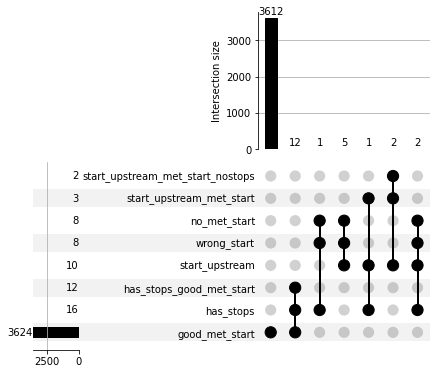

    VC_RS18780, VC0258, VC_A0473, VC_RS04215, VC_A0494, VC_RS18990, VC_RS19100, VC_RS18850


    VC_RS18780, VC1841, VC0258, VC_A0473, VC_RS04215, VC_A0494, VC_RS18990, VC_RS19100, VC_RS18775, VC_RS19090


    VC_RS18775, VC1841, VC_RS19090


    VC_RS18775, VC1841


In [7]:
criteria = detect_fishy_genes(codon_counts)

There are some genes that have stop readthrough, so we'll not exclude genes that contain stop codons. We'll only exclude those that do not have a valid start codon.
We also integrate "informative" columns into the index, so that we have a counts-only table.

## Preparing data for codon usage bias calculation

### Applying the chosen filtering and re-formatting the table

In [8]:
codon_counts_valid_start = sort_counts_by_aa(
    make_aa_codon_columns(
        make_counts_only(
            codon_counts[~criteria["no_met_start"]],
            ref_info_cols=[
                config["alt_tag_kw"], config["seq_id_kw"], "length",
                "chrom", "start", "end", "start_codon", "expected_start_aa",
                "first_stop", "nb_stops", "start_upstream", "end_downstream"])))

In [9]:
codon_counts_valid_start.shape

(3627, 64)

In [10]:
codon_counts_valid_start.head()

aa                                                                                                                                 A  \
codon                                                                                                                            GCA   
old_locus_tag locus_tag  length chrom start end  start_codon expected_start_aa first_stop nb_stops start_upstream end_downstream       
VC0002        VC_RS00005 90     NC    371   806  ATG         M                 0          0        False          False            0   
VC0003        VC_RS00010 90     NC    815   2177 ATG         M                 0          0        False          False            1   
VC0004        VC_RS00015 90     NC    2270  3896 ATG         M                 0          0        False          False            1   
VC0005        VC_RS00020 90     NC    3898  4156 ATG         M                 0          0        False          False            1   
VC0006        VC_RS00025 90     NC    4122  4446 TTG         M                 0          0        False          False            0   

aa                                                                                                                                    \
codon                                                                                                                            GCC   
old_locus_tag locus_tag  length chrom start end  start_codon expected_start_aa first_stop nb_stops start_upstream end_downstream       
VC0002        VC_RS00005 90     NC    371   806  ATG         M                 0          0        False          False            0   
VC0003        VC_RS00010 90     NC    815   2177 ATG         M                 0          0        False          False            1   
VC0004        VC_RS00015 90     NC    2270  3896 ATG         M                 0          0        False          False            0   
VC0005        VC_RS00020 90     NC    3898  4156 ATG         M                 0          0        False          False            1   
VC0006        VC_RS00025 90     NC    4122  4446 TTG         M                 0          0        False          False            0   

aa                                                                                                                                    \
codon                                                                                                                            GCG   
old_locus_tag locus_tag  length chrom start end  start_codon expected_start_aa first_stop nb_stops start_upstream end_downstream       
VC0002        VC_RS00005 90     NC    371   806  ATG         M                 0          0        False          False            1   
VC0003        VC_RS00010 90     NC    815   2177 ATG         M                 0          0        False          False            1   
VC0004        VC_RS00015 90     NC    2270  3896 ATG         M                 0          0        False          False            2   
VC0005        VC_RS00020 90     NC    3898  4156 ATG         M                 0          0        False          False            0   
VC0006        VC_RS00025 90     NC    4122  4446 TTG         M                 0          0        False          False            0   

aa                                                                                                                                    \
codon                                                                                                                            GCT   
old_locus_tag locus_tag  length chrom start end  start_codon expected_start_aa first_stop nb_stops start_upstream end_downstream       
VC0002        VC_RS00005 90     NC    371   806  ATG         M                 0          0        False          False            0   
VC0003        VC_RS00010 90     NC    815   2177 ATG         M                 0          0        False          False            2   
VC0004        VC_RS00015 90     NC    2270  3896 ATG 

### Saving the table for further processing

In [11]:
usage_dir = Path(config["out_dir"]).joinpath(
    "usage_computations", "Vcholerae", "GCF_000006745.1_ASM674v1")
save_counts_table(
    codon_counts_valid_start,
    usage_dir.joinpath("codon_counts_valid_start.tsv"))